In [1]:
 import pandas as pd
    

In [92]:
df = pd.read_csv('list3.csv', header=None, sep=";") 

In [93]:
df.columns = ["x", "y", "time"]

In [94]:
df.shape

(48, 3)

In [105]:
df = df[df.time < 15]

In [106]:
df.head()

,x,y,time
3,55,58,6.967280
5,36,76,2.762005
6,87,27,2.702556
7,77,26,11.476853
8,50,22,2.932524


In [107]:
df.time.mean()

3.9716175378751157

In [108]:
df.corr()

,x,y,time
x,1.000000,-0.092782,0.299572
y,-0.092782,1.000000,0.223979
time,0.299572,0.223979,1.000000


In [109]:

from sklearn import linear_model


In [110]:
regr = linear_model.LinearRegression()

In [101]:
X_train = df[["x", "y"]]

In [129]:
X_train["one_c"] = np.logical_or((df.x < 10), (df.y < 10))

In [130]:
Y = df["time"]

In [131]:
regr.fit(X_train, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [132]:
import numpy as np
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_train) - Y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_train, Y))

('Coefficients: \n', array([ 0.0155063 ,  0.00546405, -1.97353428]))
Mean squared error: 3.59
Variance score: 0.25


In [133]:

import matplotlib.pyplot as plt

In [134]:
%matplotlib inline

In [135]:
import seaborn as sns

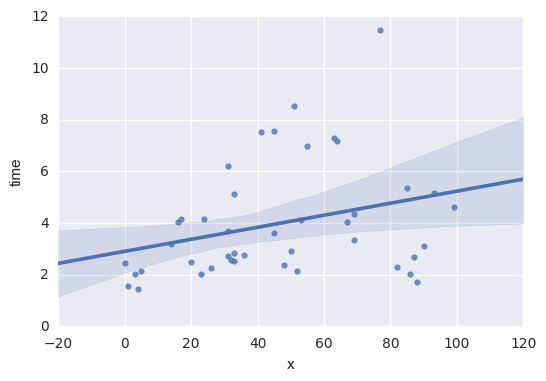

In [136]:
ax = sns.regplot( y=Y, x=X_train.x, data=df)

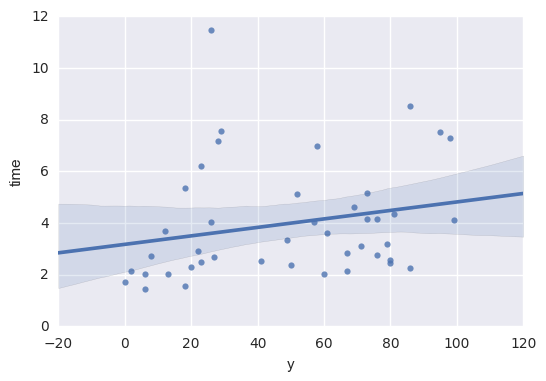

In [137]:
ax = sns.regplot( y=Y, x=X_train.y, data=df)

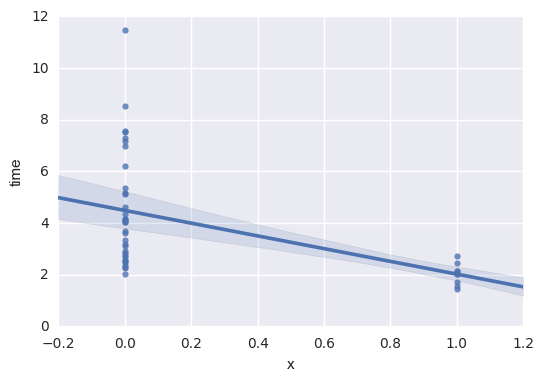

In [139]:
ax = sns.regplot( y=Y, x=X_train.one_c, data=df)

In [140]:
import cPickle
# save the classifier
with open('classifier.pkl', 'wb') as fid:
    cPickle.dump(regr, fid)   

In [141]:

with open('classifier.pkl', 'rb') as fid:
    regr_loaded = cPickle.load(fid)

In [145]:
regr_loaded.predict([0, 10, False])

/Users/miguel/Desktop/pythonVirtual/BigData/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 3.46249201])

In [143]:
regr_loaded.predict([0, 0])

/Users/miguel/Desktop/pythonVirtual/BigData/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: shapes (1,2) and (3,) not aligned: 2 (dim 1) != 3 (dim 0)

In [75]:
regr_loaded.predict([100, 0])

/Users/miguel/Desktop/pythonVirtual/BigData/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 6.05748036])